<a href="https://colab.research.google.com/github/domysolano/Subplots-on-Seaborn/blob/main/Subplots_on_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Maestría en Inteligencia Artificial y Analítica de Datos**

Curso: *Programación para Analítica Descriptiva y Predictiva*

* Semestre: Enero-Junio 2026
* Profesor: Dr. Vicente García Jiménez
* Alumno: Ricardo Solano Monje
* Matrícula: 266221
* Unidad 1
* Práctica 11: Seaborn y Subplots.
* Objetivo de la práctica: Hacer uso de Seaborn y subplots para visualizar simultáneamente diferentes aspectos de un dataset.
* Realizado por: Ricardo Solano Monje

# Práctica 11: Seaborn y Subplots
## Objetivo
Utilizar Seaborn junto con plt.subplots() para visualizar diferentes aspectos de un conjunto de datos en una sola figura.

Instrucciones:
* Carga el dataset "penguins" de Seaborn. Utiliza df = sns.load_dataset("penguins")
* Usa plt.subplots() para crear una figura con 2 filas y 2 columnas.
* Genera los siguientes gráficos:
    * (0,0): sns.histplot(): Histograma de las longitudes de aletas.
    * (0,1): sns.boxplot(): Boxplot comparando la masa corporal por especie.
    * (1,0): sns.scatterplot(): Dispersión entre masa corporal y largo de aletas.
    * (1,1): sns.violinplot(): Violin plot de la masa corporal según la especie.
* Personaliza los gráficos con títulos y colores adecuados.
* Ajusta el diseño con plt.tight_layout().

### The Seaborn penguins dataset metadata

The dataset contains 344 observations of penguins from 3 species (Adelie, Gentoo, Chinstrap) collected by Dr. Kristen Gorman at Palmer Station, Antarctica.

It is used for classification and data exploration, featuring physical measurements like bill dimensions, flipper length, and body mass across three islands.

**The dataset contains 7 main columns**:
* species: Species of penguin (Adelie, Chinstrap, Gentoo).
* island: Island in the Palmer Archipelago, Antarctica (Biscoe, Dream, Torgersen).
* bill_length_mm: Length of the bill in millimeters.
* bill_depth_mm: Depth of the bill in millimeters.
* flipper_length_mm: Length of the flipper in millimeters.
* body_mass_g: Body mass in grams.
* sex: Gender of the penguin (Female, Male).

Key Characteristics
Purpose: Often used as a modern, cleaner alternative to the Iris dataset for data visualization and machine learning classification tasks.

Data Quality: The dataset contains some missing values (NaNs), particularly in the sex column, requiring, data cleaning.

Loading: It can be loaded using df = sns.load_dataset("penguins").

Variables: Contains a mix of categorical (species, island, sex) and numerical (measurements) data.

### Minimal colors, axis names taken from column names.

inner parameter not choosen for violin plot, used instead default value (box).

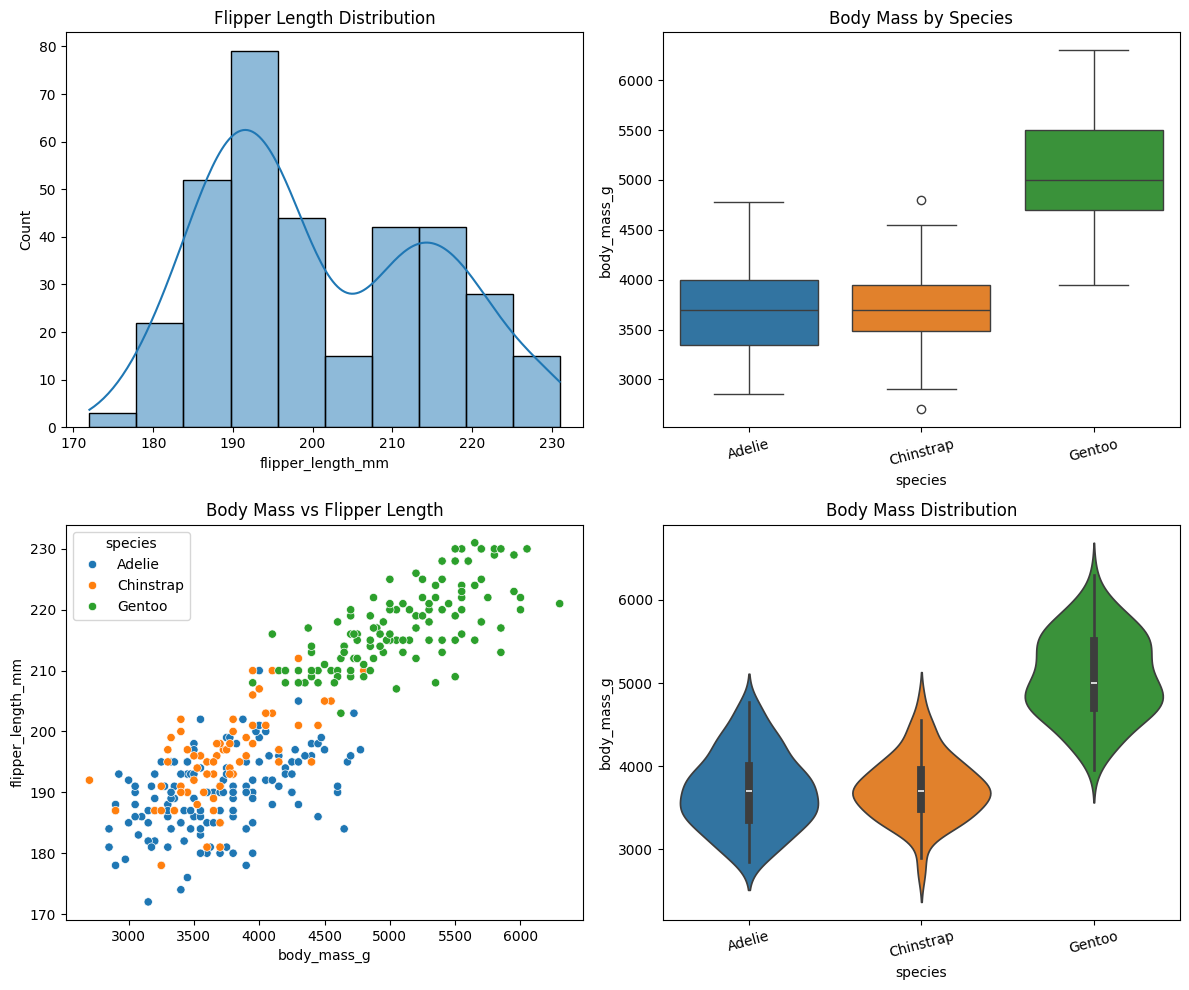

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

def main(save_path=None):

    penguins = sns.load_dataset("penguins") # Load data

    # Create subplots, 4 subplots as a matrix, starting at [0,0]
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # Plot 1: Histogram
    sns.histplot(data=penguins, x='flipper_length_mm', kde=True, ax=axes[0, 0])
    axes[0, 0].set_title('Flipper Length Distribution')

    # Plot 2: Boxplot - color equals hue values taken from x values =species
    sns.boxplot(data=penguins, x='species', y='body_mass_g',
               hue='species', legend=False, ax=axes[0, 1])
    axes[0, 1].set_title('Body Mass by Species')
    axes[0, 1].tick_params(axis='x', rotation=15)

    # Plot 3: Scatterplot color choosen using hue equal to species the x values
    sns.scatterplot(data=penguins, x='body_mass_g', y='flipper_length_mm',
                   hue='species', ax=axes[1, 0])
    axes[1, 0].set_title('Body Mass vs Flipper Length')

    # Plot 4: Violinplot - color choosen using hue equal to x
    sns.violinplot(data=penguins, x='species', y='body_mass_g',
                  hue='species', legend=False,ax=axes[1, 1])
    axes[1, 1].set_title('Body Mass Distribution')
    axes[1, 1].tick_params(axis='x', rotation=15)

    plt.tight_layout()
    # Save if path provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

    return penguins

if __name__ == "__main__":
    df = main(save_path='raw_plotting_penguins_analysis.png')

## Violin plot's inner parameter
* To show inner lines or boxes within a Seaborn violin plot, use the inner parameter in the seaborn.violinplot() function and set it to one of the following options:
    * inner="quart" (or "quartile") to display the quartiles of the data as lines.
    * inner="box" to draw a miniature box-and-whisker plot inside the violin.
    * inner="point" or inner="stick" to show each individual observation as points or vertical lines, respectively.
    * inner=None to draw unadorned violins without any interior representation.

### Improved plot.
Axis names, plot title, legend title, legen location, figure' overall title and species names were specifically set. inner parameter set to "quartile"

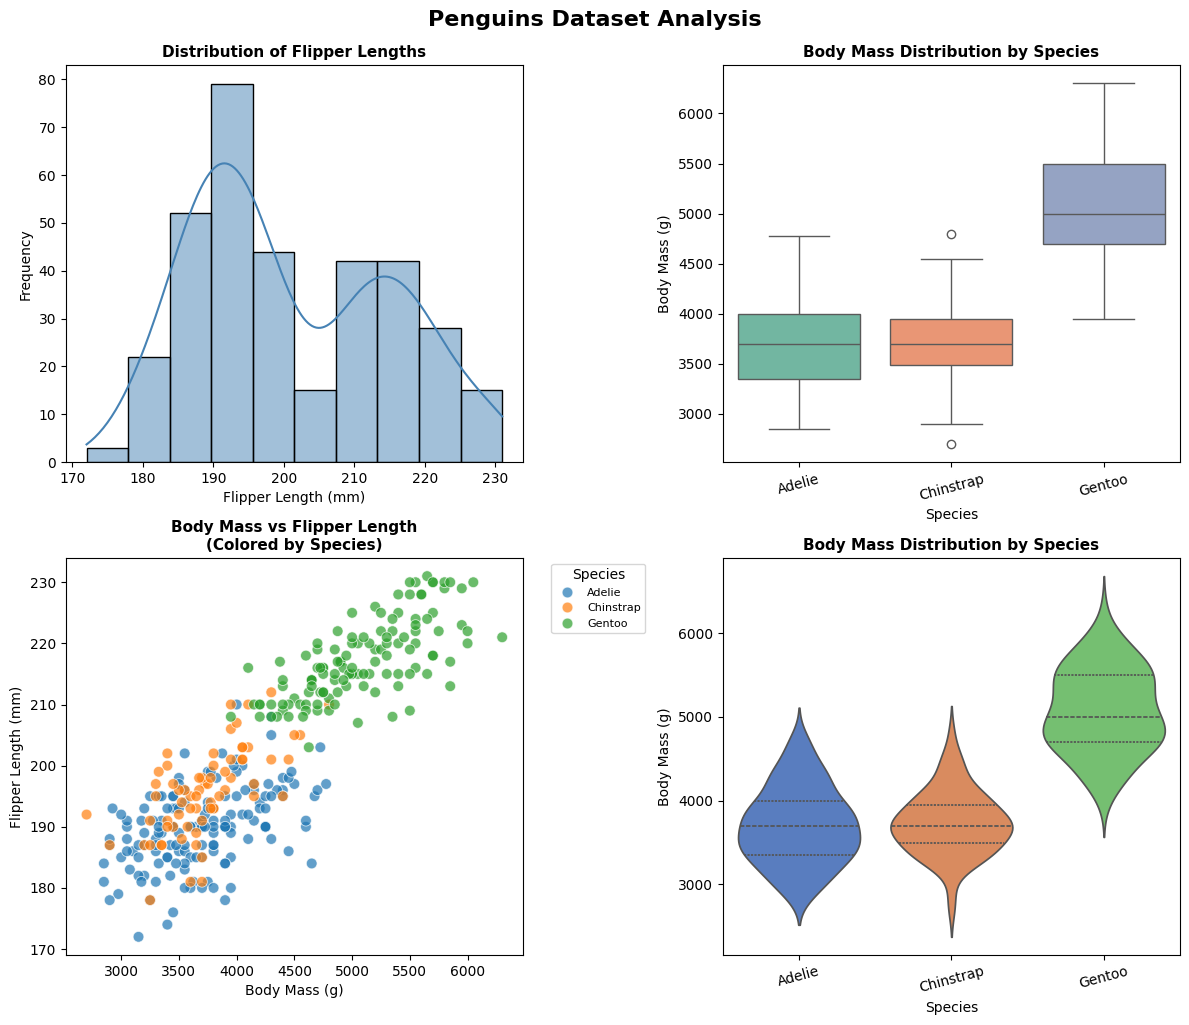

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def load_penguins_data():
    """Load the penguins dataset from seaborn."""
    return sns.load_dataset("penguins")

def create_penguins_grid(df, figsize=(12, 10)):
    """Create 2x2 subplot grid with different seaborn plots.
    set_title, set_xlabel, set_ylabel, setting legend (axes.legend(), setting figure's title (fig.suptitle())
    setting ticks (axes.tick_params()) and setting violin's inner shape as quartile (sns.violinplot(...inner='quartile))
    """
    fig, axes = plt.subplots(2, 2, figsize=figsize)

    # a) (0,0): Histograma de las longitudes de aletas.
    # a) Histogram of flipper lengths (top-left), (0,0) position
    sns.histplot(data=df, x='flipper_length_mm', kde=True,
                color='steelblue', ax=axes[0, 0])
    axes[0, 0].set_title('Distribution of Flipper Lengths', fontsize=11, fontweight='bold')
    axes[0, 0].set_xlabel('Flipper Length (mm)')
    axes[0, 0].set_ylabel('Frequency')

    # b) (0,1): Boxplot comparando la masa corporal por especie.
    # b) Boxplot of body mass by species (top-right) , (0,1) position
    sns.boxplot(data=df, x='species', y='body_mass_g',
               hue='species', palette='Set2', legend=False, ax=axes[0, 1])
    axes[0, 1].set_title('Body Mass Distribution by Species', fontsize=11, fontweight='bold')
    axes[0, 1].set_xlabel('Species')
    axes[0, 1].set_ylabel('Body Mass (g)')
    axes[0, 1].tick_params(axis='x', rotation=15) #rotate the x-axis tick labels by 15 degrees counter-clockwise to avoid overlapping.

    # c) (1,0): Dispersión entre masa corporal y largo de aletas.
    # c) Scatter plot of body mass vs flipper length (bottom-left)
    # Color by species only makes it clean , (1,0) position, (bottom, left)
    sns.scatterplot(data=df, x='body_mass_g', y='flipper_length_mm',
                   hue='species', s=60, alpha=0.7, ax=axes[1, 0])
    axes[1, 0].set_title('Body Mass vs Flipper Length\n(Colored by Species)', fontsize=11, fontweight='bold')
    axes[1, 0].set_xlabel('Body Mass (g)')
    axes[1, 0].set_ylabel('Flipper Length (mm)')
    axes[1, 0].legend(title='Species', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

    # (1,1): Violin plot de la masa corporal según la especie.
    # d) Violin plot of body mass by species (bottom-right) , (1,1) position
    """
    To show inner lines or boxes within a Seaborn violin plot,
    use the inner parameter in the seaborn.violinplot() function and set it to one of the following options:
    inner="quart" (or "quartile") to display the quartiles of the data as lines.
    inner="box" to draw a miniature box-and-whisker plot inside the violin.
    inner="point" or inner="stick" to show each individual observation as points or vertical lines, respectively.
    inner=None to draw unadorned violins without any interior representation.
    """
    sns.violinplot(data=df, x='species', y='body_mass_g',
                  hue='species', palette='muted', legend=False,
                  inner='quartile', ax=axes[1, 1])
    axes[1, 1].set_title('Body Mass Distribution by Species', fontsize=11, fontweight='bold')
    axes[1, 1].set_xlabel('Species')
    axes[1, 1].set_ylabel('Body Mass (g)')
    axes[1, 1].tick_params(axis='x', rotation=15) #rotate the x-axis tick labels by 15 degrees counter-clockwise to avoid overlapping.

    plt.tight_layout()# cleanup step, it eliminates overlap between subplots and their labels.

    return fig, axes

def main(save_path=None):
    """Main function"""
    # Load data
    df = load_penguins_data()

    # Create visualization
    fig, axes = create_penguins_grid(df)

    # Add figure's overall title
    fig.suptitle('Penguins Dataset Analysis', fontsize=16, fontweight='bold', y=1.02)

    # Save figure to image if path provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')

    plt.show()
    return df

if __name__ == "__main__":
    df = main(save_path='improved_plotting_penguins_analysis.png')